In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [191]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [192]:
df.shape

(50000, 14)

# Data Cleaning

In [193]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [194]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: >

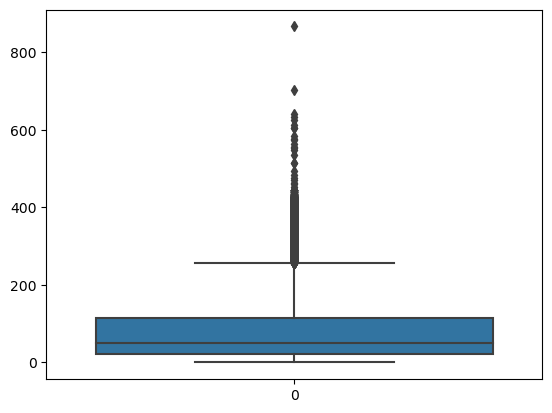

In [195]:
sns.boxplot(data = df['purchase_lead'])

<Axes: xlabel='purchase_lead', ylabel='Count'>

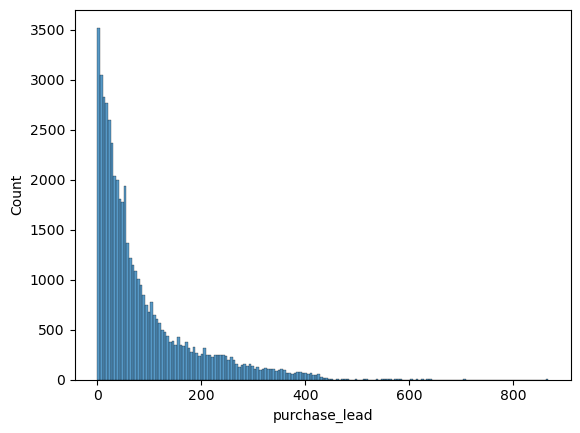

In [196]:
sns.histplot(data = df['purchase_lead'])

In [197]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    df_filtered = df.copy()
    for column in columns:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers for the current column
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
    
    return df_filtered



# Apply the function to remove outliers in the specified columns
df_filtered = remove_outliers_iqr(df, ['purchase_lead', 'length_of_stay'])

# Display the descriptive statistics of the filtered DataFrame

df = df_filtered.copy()
df_filtered.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000
mean,1.577908,68.189110,16.243817,9.067885,0.658786,0.295416,0.422718,7.231105,0.150503
std,1.006900,62.678588,14.595807,5.380411,0.474123,0.456235,0.493997,1.501371,0.357568
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,20.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,47.000000,6.000000,9.000000,1.000000,0.000000,0.000000,7.000000,0.000000
75%,2.000000,98.000000,25.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,256.000000,65.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: xlabel='purchase_lead', ylabel='Count'>

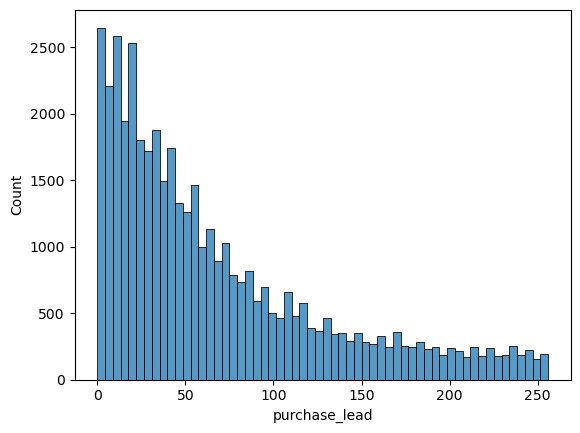

In [198]:
sns.histplot(data = df['purchase_lead'])

# Explorartory Data Analysis 

# Questions : 
    1) What variable contribute towards a customer booking holiday.
    2) Which customers are most likely to buy a holiday with us.

In [199]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Tue', 'Fri', 'Sun'], dtype=object)

In [200]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000
mean,1.577908,68.189110,16.243817,9.067885,0.658786,0.295416,0.422718,7.231105,0.150503
std,1.006900,62.678588,14.595807,5.380411,0.474123,0.456235,0.493997,1.501371,0.357568
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,20.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,47.000000,6.000000,9.000000,1.000000,0.000000,0.000000,7.000000,0.000000
75%,2.000000,98.000000,25.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,256.000000,65.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [201]:
     mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [202]:
df["flight_day"].unique()

array([6, 3, 4, 1, 2, 5, 7], dtype=int64)

In [203]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0


In [204]:
(df['booking_complete'] ==1).sum()

6487

In [205]:
(df['booking_complete'] ==0).sum()

36615

In [206]:
data = df.copy()

In [207]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
data = data[numeric_columns]


In [208]:
data.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.188626,-0.125158,0.012304,0.014587,0.138330,0.037601,0.026471,-0.065997,0.028426
purchase_lead,0.188626,1.000000,0.031322,0.031265,0.031373,0.034199,0.017653,0.020837,0.082844,-0.028016
length_of_stay,-0.125158,0.031322,1.000000,-0.038985,0.004529,0.240156,0.004172,0.103046,0.167297,-0.092030
flight_hour,0.012304,0.031265,-0.038985,1.000000,0.005287,-0.008964,0.014155,0.012894,-0.007901,0.010885
flight_day,0.014587,0.031373,0.004529,0.005287,1.000000,0.001790,0.006342,0.011667,0.014828,-0.006039
wants_extra_baggage,0.138330,0.034199,0.240156,-0.008964,0.001790,1.000000,0.204294,0.205145,0.052986,0.066300
wants_preferred_seat,0.037601,0.017653,0.004172,0.014155,0.006342,0.204294,1.000000,0.314856,0.096946,0.053140
wants_in_flight_meals,0.026471,0.020837,0.103046,0.012894,0.011667,0.205145,0.314856,1.000000,0.154192,0.025459
flight_duration,-0.065997,0.082844,0.167297,-0.007901,0.014828,0.052986,0.096946,0.154192,1.000000,-0.112243
booking_complete,0.028426,-0.028016,-0.092030,0.010885,-0.006039,0.066300,0.053140,0.025459,-0.112243,1.000000


In [209]:
df_corr = data.corr()

<Axes: >

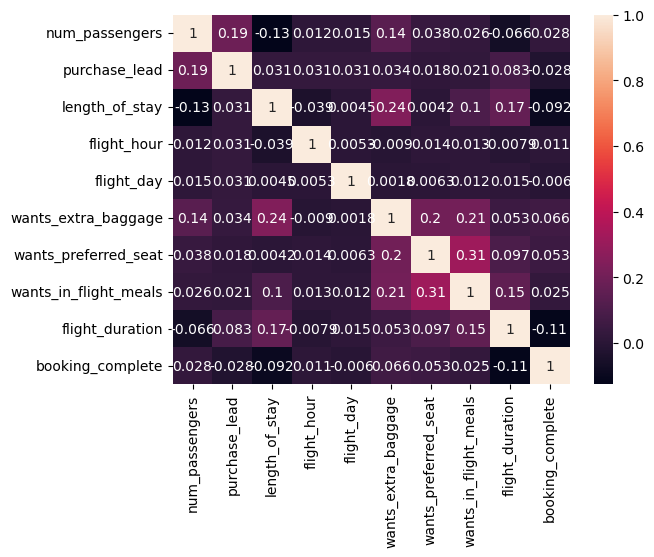

In [210]:
sns.heatmap(df_corr,annot=True)

In [211]:
df.shape

(43102, 14)

In [212]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0


In [213]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000
mean,1.577908,68.189110,16.243817,9.067885,3.804719,0.658786,0.295416,0.422718,7.231105,0.150503
std,1.006900,62.678588,14.595807,5.380411,1.968590,0.474123,0.456235,0.493997,1.501371,0.357568
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,20.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,47.000000,6.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.000000,0.000000
75%,2.000000,98.000000,25.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,256.000000,65.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [214]:
from sklearn.preprocessing import LabelEncoder
numerical_columns = df.select_dtypes(exclude=['object']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000,43102.000000
mean,1.577908,0.116097,1.987704,68.189110,16.243817,9.067885,3.804719,390.136490,37.017192,0.658786,0.295416,0.422718,7.231105,0.150503
std,1.006900,0.320345,0.128300,62.678588,14.595807,5.380411,1.968590,221.879498,32.097742,0.474123,0.456235,0.493997,1.501371,0.357568
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,20.000000,5.000000,5.000000,2.000000,230.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,47.000000,6.000000,9.000000,4.000000,380.000000,36.000000,1.000000,0.000000,0.000000,7.000000,0.000000
75%,2.000000,0.000000,2.000000,98.000000,25.000000,13.000000,5.000000,603.000000,55.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,256.000000,65.000000,23.000000,7.000000,788.000000,100.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [215]:
#keeping columns having some correlation among each others and has some domain correlation
columns_to_keep = ['purchase_lead', 'num_passengers','wants_extra_baggage','length_of_stay','wants_in_flight_meals','wants_preferred_seat']

# Keep only the specified columns
df_kept = df.loc[:, columns_to_keep]

In [216]:
df.shape

(43102, 14)

In [217]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1,1,0,2,112,20,3,6,0,59,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,35,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,59,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,35,1,0,1,5.52,0
5,1,0,2,3,48,20,4,0,59,1,0,1,5.52,0


# Model Training

In [218]:
X = df.drop('booking_complete', axis=1)

In [219]:
y = df['booking_complete']

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((34481, 13), (8621, 13))

In [221]:
# First Model training using linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.12447592374411666


                       importance
feature                          
purchase_lead               0.191
route                       0.153
flight_hour                 0.139
length_of_stay              0.117
booking_origin              0.113
flight_day                  0.091
flight_duration             0.074
num_passengers              0.050
wants_in_flight_meals       0.023
wants_preferred_seat        0.017
wants_extra_baggage         0.016
sales_channel               0.013
trip_type                   0.002
---------------------------------------------------------------------------
Mean Squared Error: 0.14766268414337083


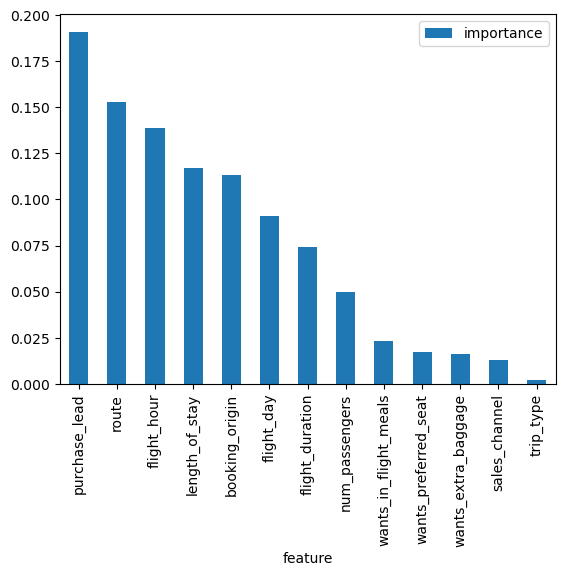

In [241]:
#Training model using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier(n_estimators=100)  # adjust hyperparameters as needed
model.fit(X_train, y_train)
# Fit the model to the training data
#model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
#show to plot importances
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()
print("---------------------------------------------------------------------------")
# Print mean squared error
print("Mean Squared Error:", mse)

In [242]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative scores to positive (as sklearn returns negated values for loss functions)
cv_scores = -cv_scores

# Output evaluation metrics
print("Cross-Validation Mean Squared Error:", cv_scores)
print("Mean MSE:", cv_scores.mean())
print("Standard Deviation of MSE:", cv_scores.std())

Cross-Validation Mean Squared Error: [0.15091057 0.47430692 0.86067285 0.59269142 0.47447796]
Mean MSE: 0.5106119439096946
Standard Deviation of MSE: 0.22859942256879173
